In [17]:
X=np.linspace(0,20,50)
Y= -2 * X + 1

## Stochastic GD

In [40]:
from sklearn.utils import shuffle

def stochastic_GD(X,Y, alpha=0.0001, threshold= 0.0001, iterations= 2000):
    
    X, Y = shuffle(X, Y, random_state=0)
    m = len(X)
    theta_0 = 0.0
    theta_1 = 0.0
    cost = []
    all_theta_0 = []
    all_theta_1 = []
    iter_count = 0
        
    for i in range(iterations):
        for j in range(m):        
            y_pred = theta_0 + (theta_1 * X[j])
            cost.append(((y_pred - Y[j]) ** 2) / 2)
            theta_0_grad = (y_pred - Y[j])
            theta_1_grad = (y_pred - Y[j]) * X[j]
            theta_0 = theta_0 - (alpha * theta_0_grad)
            theta_1 = theta_1 - (alpha * theta_1_grad)
            all_theta_0.append(theta_0)
            all_theta_1.append(theta_1)
            iter_count += 1
        if i != 0 and np.abs(cost[i*m] - cost[(i-1)*m]) < threshold:
            break
    return all_theta_0, all_theta_1, cost, all_theta_0[-1], all_theta_1[-1], iter_count

all_theta_0, all_theta_1, cost, all_theta_0_opt, all_theta_1_opt, iter_count  = stochastic_GD(X, Y)

In [41]:
all_theta_0_opt, all_theta_1_opt

(-0.12092094897633271, -1.9179905434284161)

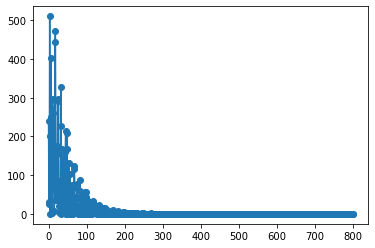

In [42]:
plt.plot(np.arange(iter_count), cost, '-o')
plt.show()

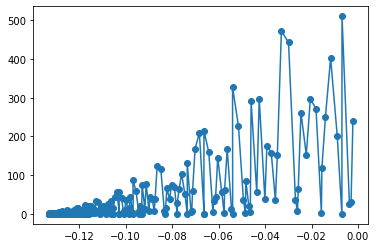

In [43]:
plt.plot(all_theta_0, cost, '-o')
plt.show()

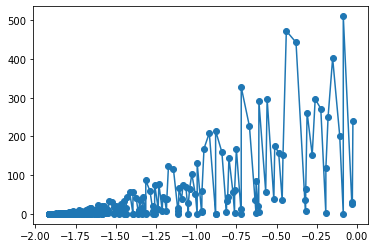

In [44]:
plt.plot(all_theta_1, cost, '-o')
plt.show()

Accuracy: 99.76665050331475 %


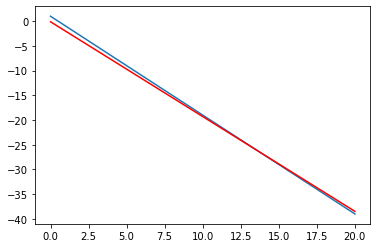

In [45]:
from sklearn.metrics import r2_score

y_pred = all_theta_0_opt + all_theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

plt.plot(X,Y)
plt.plot(X, y_pred, c='Red')
plt.show()

# Mini-Batch

In [66]:
def get_partities_data(X,Y, batch_size):
    batches_X = []
    batches_Y = []
    i = 0
    while i < len(X):
        if i + batch_size > len(X):
            batches_X.append(X[i:len(X)])
            batches_Y.append(Y[i:len(X)])
        else:
            batches_X.append(X[i:i+batch_size])
            batches_Y.append(Y[i:i+batch_size])
        i= i + (batch_size)
    return batches_X, batches_Y

In [110]:
def mini_batch(X, Y, batch_size, iterations=2000, threshold=0.001, alpha=0.001):
    
    X, Y = shuffle(X, Y, random_state=0)
    m = len(X)
    theta_0 = 0.0
    theta_1 = 0.0
    cost = []
    all_theta_0 = []
    all_theta_1 = []
    iter_count = 0
    gen_count = 0
    X_Parts, Y_Parts = get_partities_data(X,Y, batch_size)
    no_of_batches = len(X_Parts)
    for i in range(iterations):
        for j in range(len(X_Parts)):
            ypred = theta_0 + (theta_1 * X_Parts[j])
            error = (ypred - Y_Parts[j])
            cost.append((np.dot(error, error.T)) / (2 / len(X_Parts[j])))
            theta_0_grad = (np.sum(error)) / m
            theta_1_grad = (np.sum((error).T @ X_Parts[j])) / m
            theta_0 = theta_0 - alpha * theta_0_grad
            theta_1 = theta_1 - alpha * theta_1_grad
            all_theta_0.append(theta_0)
            all_theta_1.append(theta_1)
            iter_count += 1
        if i != 0:
            if np.abs(cost[i*no_of_batches] - cost[(i - 1)*no_of_batches]) < threshold and i > 0:
                break
        gen_count += 1
    return all_theta_0, all_theta_1, cost, all_theta_0[-1], all_theta_1[-1], iter_count, gen_count
    

In [111]:
all_theta_0, all_theta_1, cost, theta_0_opt, theta_1_opt, iter_count, gen_count = mini_batch(X,Y, 5)
print("Takes: ", gen_count, " Iterations")

Takes:  39  Iterations


In [112]:
theta_0_opt, theta_1_opt

(-0.13053675618080965, -1.9079441244119069)

In [113]:
iter_count

400

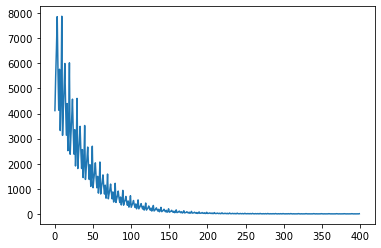

In [114]:
plt.plot(np.arange(iter_count), cost)
plt.show()

Accuracy: 99.75637161086205 %


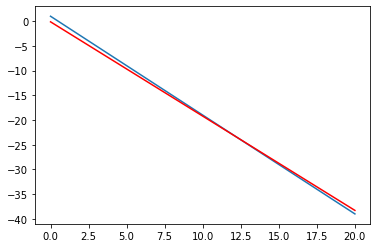

In [115]:
from sklearn.metrics import r2_score

y_pred = theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

plt.plot(X,Y)
plt.plot(X, y_pred, c='Red')
plt.show()